# CISC 867 Project


## Authors

- Dominic Phillips
- Bennet Montgomery

## Important links

- [Original paper](https://paperswithcode.com/paper/unsupervised-any-to-many-audiovisual)
  - [Code](https://github.com/dunbar12138/Audiovisual-Synthesis)
- [Google Drive folder](https://drive.google.com/drive/folders/12O-IlQd4ZM2kxPVJ9hitSUfuSrprPIEC)
- [Project proposal](https://queensuca-my.sharepoint.com/personal/16drp4_queensu_ca/_layouts/15/Doc.aspx?sourcedoc=%7B04585478-D0CA-47C6-B276-3098828A7DAB%7D&file=Project%20Proposal.pptx&action=edit&mobileredirect=true)
- [OnQ deliverables](https://onq.queensu.ca/d2l/le/content/582452/Home)
  - [Project draft](https://onq.queensu.ca/d2l/lms/dropbox/user/folder_submit_files.d2l?db=258790&grpid=593240&isprv=0&bp=0&ou=582452)
    - [Rubric](https://onq.queensu.ca/d2l/lp/rubrics/preview.d2l?ou=582452&rubricId=47677&originTool=quicklinks)
    - [Draft meeting spreadsheet](https://docs.google.com/spreadsheets/d/1ZefaU8afq16ykSjEAJRLccg8th2RtwL6R4Jt-lg6nqM/edit#gid=0)
    - [Overleaf project](https://www.overleaf.com/project/6171e082af75ef1ea42efe1f)
- [Tensorflow tutorial](https://www.tensorflow.org/tutorials/audio/simple_audio#spectrogram)

## Background links

- [What is audio](https://youtu.be/m3XbqfIij_Y)

## What success will look like

- Reproduce the objective acoustic analysis (VCTK) to evaluate the model performance. We should arrive within 0.5 of the SCA value calculated by the paper for their model and 2 for the MCD.​
- Training a model faster than the 3 minutes the paper claims​
- Alternatively, failing to reproduce the objective analysis claimed in the paper and showing the research to be irreproducible. ​

## Implementation

### Resources

#### Discover Colab hardware

In [143]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   44G   65G  40% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.2G  821M  59% /sbin/docker-init
tmpfs           6.4G   28K  6.4G   1% /var/colab
/dev/sda1        81G   47G   34G  58% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [144]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [145]:
!cat /proc/meminfo

MemTotal:       13302924 kB
MemFree:         7296092 kB
MemAvailable:   12260672 kB
Buffers:          123152 kB
Cached:          4756996 kB
SwapCached:            0 kB
Active:          1190808 kB
Inactive:        4503144 kB
Active(anon):     618024 kB
Inactive(anon):      472 kB
Active(file):     572784 kB
Inactive(file):  4502672 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               888 kB
Writeback:             0 kB
AnonPages:        813832 kB
Mapped:           503308 kB
Shmem:              1200 kB
KReclaimable:     215072 kB
Slab:             260340 kB
SReclaimable:     215072 kB
SUnreclaim:        45268 kB
KernelStack:        4976 kB
PageTables:         8740 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6651460 kB
Committed_AS:    3689920 kB
VmallocTotal:   34359738367 kB
VmallocUsed:        7372 kB
VmallocChunk:          0 kB
Percpu:          

In [146]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



#### Download VCTK dataset

In [147]:
#@title VCTK Dataset
Size = "Smaller" #@param ["Full", "Small", "Smaller"]

if Size == "Full":
  vctk_dataset_path = "/content/VCTK-Corpus/"
  archive_path="/content/VCTK-Corpus.tar.gz"
  !test ! -e $archive_path && wget -O $archive_path "https://queensuca-my.sharepoint.com/:u:/g/personal/16drp4_queensu_ca/EcnCAgHdAwBJmWk9vNcpiKgB5Rhi6GNtSchx6zGEhWe-fw?download=1"
  !test ! -e $vctk_dataset_path && tar -xf $archive_path -O $vctk_dataset_path
elif Size == "Small":
  vctk_dataset_path = "/content/VCTK-Corpus-small/"
  !test ! -e /content/VCTK-Corpus-small.7z && wget -O /content/VCTK-Corpus-small.7z "https://queensuca-my.sharepoint.com/:u:/g/personal/16drp4_queensu_ca/Ebz_WoXK4T9KjbJq_SFCsZQB94PqsKOnQ9HwB5olpGeQIw?download=1"
  !test ! -e $vctk_dataset_path && 7z x VCTK-Corpus-small.7z
elif Size == "Smaller":
  vctk_dataset_path = "/content/VCTK-Corpus-smaller/"
  archive_path="/content/VCTK-Corpus-smaller.tar.gz"
  !test ! -e $archive_path && wget -O $archive_path "https://queensuca-my.sharepoint.com/:u:/g/personal/16drp4_queensu_ca/EfRSVbO-ohRFlUFhA9lx4qsBVl4s5FU676hF9uTRSAjOgg?download=1"
  !test ! -e $vctk_dataset_path && tar -xzf $archive_path


### Package updates

In [148]:
# on first run, set to true
try:
  firstload = firstload
except NameError:
  # pass
  firstload = True

# only execute commands on first run
# allows executing all cells to be much faster
if firstload:
  !pip install pydub
  !pip install tensorflow_io
firstload = False

### Imports

In [149]:
# dataset building
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import pandas as pd
# import librosa
import glob
import tensorflow_io as tfio
import sklearn.model_selection

# model building
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
import numpy as np
import math

# debugging and presentation
import tqdm.notebook as tq
import matplotlib.pyplot as plt
from pprint import pprint
import IPython
import time

### Acceleration config

In [150]:
#@title Default title text
acceleration = "CPU" #@param ["CPU", "GPU", "TPU"]

if acceleration == "GPU":
  device_name = tf.test.gpu_device_name()
  if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
  print('Found GPU at: {}'.format(device_name))
elif acceleration == "TPU":
  # https://www.tensorflow.org/guide/tpu
  resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
  tf.config.experimental_connect_to_cluster(resolver)
  # This is the TPU initialization code that has to be at the beginning.
  tf.tpu.experimental.initialize_tpu_system(resolver)
  print("All devices: ", tf.config.list_logical_devices('TPU'))

#### TPU todo

- https://www.tensorflow.org/guide/tpu
- https://stackoverflow.com/questions/62870656/file-system-scheme-local-not-implemented-in-google-colab-tpu
- https://cloud.google.com/tpu/docs/troubleshooting#cannot_use_local_filesystem
- https://cloud.google.com/tpu/docs/storage-buckets
- https://www.tensorflow.org/datasets/gcs
- https://github.com/tensorflow/models/issues/8265
- https://github.com/sayakpaul/Generating-categories-from-arXiv-paper-titles/blob/master/TPU_Experimentation.ipynb

### Constants

In [151]:
AUTOTUNE = tf.data.AUTOTUNE

### Debug flags

In [152]:
# tf.debugging.set_log_device_placement(True)

### Dataset building

#### Load speaker info

In [153]:
# read speaker-info.txt file
speaker_df = pd.read_csv(os.path.join(vctk_dataset_path, "speaker-info.txt"), delim_whitespace=True, index_col=False)
# prefix "ID" column with "p" to match folder structure
speaker_df["ID"] = "p" + speaker_df["ID"].astype(str)
# build lookup map
speaker_lookup = {x["ID"]:(i,x) for i,x in speaker_df.iterrows()}

In [154]:
speaker_df

,ID,AGE,GENDER,ACCENTS,REGION
0,p225,23,F,English,Southern
1,p226,22,M,English,Surrey
2,p227,38,M,English,Cumbria
3,p228,22,F,English,Southern
4,p229,23,F,English,Southern
...,...,...,...,...,...
103,p362,29,F,American,NaN
104,p363,22,M,Canadian,Toronto
105,p364,23,M,Irish,Donegal
106,p374,28,M,Australian,English


In [155]:
speaker_lookup["p225"]

(0, ID             p225
 AGE              23
 GENDER            F
 ACCENTS     English
 REGION     Southern
 Name: 0, dtype: object)

In [156]:
speaker_list = np.array(speaker_df["ID"].sort_values())
speaker_list

array(['p225', 'p226', 'p227', 'p228', 'p229', 'p230', 'p231', 'p232',
       'p233', 'p234', 'p236', 'p237', 'p238', 'p239', 'p240', 'p241',
       'p243', 'p244', 'p245', 'p246', 'p247', 'p248', 'p249', 'p250',
       'p251', 'p252', 'p253', 'p254', 'p255', 'p256', 'p257', 'p258',
       'p259', 'p260', 'p261', 'p262', 'p263', 'p264', 'p265', 'p266',
       'p267', 'p268', 'p269', 'p270', 'p271', 'p272', 'p273', 'p274',
       'p275', 'p276', 'p277', 'p278', 'p279', 'p281', 'p282', 'p283',
       'p284', 'p285', 'p286', 'p287', 'p288', 'p292', 'p293', 'p294',
       'p295', 'p297', 'p298', 'p299', 'p300', 'p301', 'p302', 'p303',
       'p304', 'p305', 'p306', 'p307', 'p308', 'p310', 'p311', 'p312',
       'p313', 'p314', 'p315', 'p316', 'p317', 'p318', 'p323', 'p326',
       'p329', 'p330', 'p333', 'p334', 'p335', 'p336', 'p339', 'p340',
       'p341', 'p343', 'p345', 'p347', 'p351', 'p360', 'p361', 'p362',
       'p363', 'p364', 'p374', 'p376'], dtype=object)

#### Load audio paths

In [157]:
def get_audio_paths(debug=False):
  audio_paths = tf.io.gfile.glob(os.path.join(vctk_dataset_path, "wav48", "*", "*.wav"))
  audio_paths.sort() # ensure reproducible ordering, filesystem not consistent

  if debug:
    # debug mode we will only test against few speakers
    debug_files = ["p225_001.wav", "p226_001.wav", "p227_001.wav"]
    audio_paths = [v for v in audio_paths if os.path.basename(v) in debug_files]

  return audio_paths
# audio_ds = get_audio_paths()
audio_ds = get_audio_paths(debug=True)
print(audio_ds[:3])

['/content/VCTK-Corpus-smaller/wav48/p225/p225_001.wav', '/content/VCTK-Corpus-smaller/wav48/p226/p226_001.wav', '/content/VCTK-Corpus-smaller/wav48/p227/p227_001.wav']


#### Convert to dataset

In [158]:
audio_ds = tf.data.Dataset.from_tensor_slices(audio_ds)

#### Map to (audio, speaker)

In [159]:
def get_speaker_from_path(path):
  parts = tf.strings.split(path, os.path.sep)
  return parts[-2]
  # return path.split(os.path.sep)[4]

def get_audio_data_from_path(path):
  raw = tf.io.read_file(path)
  wav, sample_rate = tf.audio.decode_wav(raw)
  wav = tf.squeeze(wav, axis=-1)
  return wav

def path_to_audio_speaker_pair_mapper(path):
  audio = get_audio_data_from_path(path)
  speaker = get_speaker_from_path(path)
  return audio, speaker

audio_ds = audio_ds.map(path_to_audio_speaker_pair_mapper, num_parallel_calls=AUTOTUNE)

#### Preview audio

In [160]:
# https://www.tensorflow.org/tutorials/audio/simple_audio
def preview_audio_waveform(audio):
  plt.plot(audio)
  plt.title("Audio")
  plt.yticks(np.arange(-1.2, 1.2, 0.2))
  plt.show()

def preview_audio_player(audio, rate=48000):
  IPython.display.display(IPython.display.Audio(audio, rate=rate))

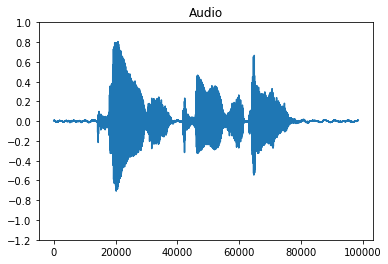

In [161]:
for audio, _ in audio_ds.take(1):
  preview_audio_waveform(audio)
  preview_audio_player(audio)

#### Map to (downsample(audio), speaker)

In [162]:
def downsample(audio, from_rate=48000, to_rate=16000):
  return tfio.audio.resample(audio, from_rate, to_rate)

def downsample_mapper(audio, speaker):
  audio = downsample(audio)
  return audio, speaker

audio_ds = audio_ds.map(downsample_mapper, num_parallel_calls=AUTOTUNE)

#### Determine longest audio clip

In [163]:
max_audio_length = int(16000 * 16.01) # rate * longest clip in seconds

max_audio_length = max([len(v) for v,_ in audio_ds])


# print("Audio max length (prev: 768099): ", max_audio_length)
print(f"Longest clip is {max_audio_length} samples ({max_audio_length//16000}s) long")



Longest clip is 75127 samples (4s) long


In [164]:
# https://www.tensorflow.org/tutorials/audio/simple_audio#spectrogram
def get_padded_audio(audio, min_length=max_audio_length):
  padding = tf.zeros([min_length] - tf.shape(audio), dtype=tf.float32)
  return tf.concat([audio, padding], 0)

#### Map to (spectrogram, speaker)

In [165]:
def get_spectrogram(audio):
  audio = get_padded_audio(audio)

  if acceleration == "CPU":
    spectrogram = tf.signal.stft(audio, frame_length=255, frame_step=128)
  elif acceleration == "GPU":
    with tf.device("/GPU:0"):
      spectrogram = tf.signal.stft(audio, frame_length=255, frame_step=128)
  elif acceleration == "TPU":
    with tf.device("/TPU:0"):
      spectrogram = tf.signal.stft(audio, frame_length=255, frame_step=128)

  spectrogram = tf.abs(spectrogram)
  return spectrogram

def spectrogram_mapper(audio, speaker):
  spectrogram = get_spectrogram(audio)
  spectrogram = tf.expand_dims(spectrogram, -1) # convert to 1-channel image
  return spectrogram, speaker

audio_ds = audio_ds.map(spectrogram_mapper, num_parallel_calls=AUTOTUNE)

#### Preview spectrogram



In [166]:
def preview_spectrogram(spectrogram):
  spectrogram = tf.squeeze(spectrogram, axis=-1) # undo conversion to 1-channel
  log_spec = np.log(spectrogram.numpy().T+np.finfo(float).eps)
  height = log_spec.shape[0]
  width = log_spec.shape[1]

  fig, axes = plt.subplots(1, figsize=(12, 4))
  # timescale = np.arange(audio.shape[0])
  # axes[0].plot(timescale, audio.numpy())
  # axes[0].set_title('Waveform')
  # axes[0].set_xlim([0, len(timescale)])

  # Convert to frequencies to log scale and transpose so that the time is
  # represented in the x-axis (columns). An epsilon is added to avoid log of zero.
  X = np.linspace(0, np.size(spectrogram.numpy()), num=width, dtype=int)
  Y = range(height)
  axes.pcolormesh(X, Y, log_spec)
  axes.set_title('Spectrogram')
  plt.show()

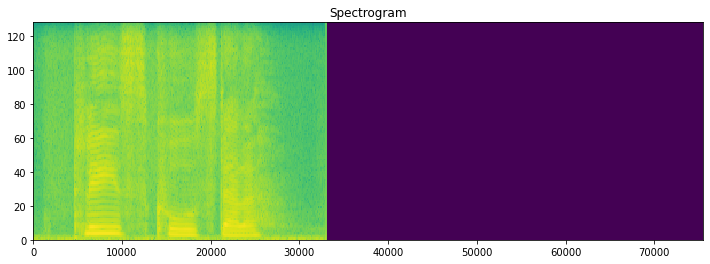

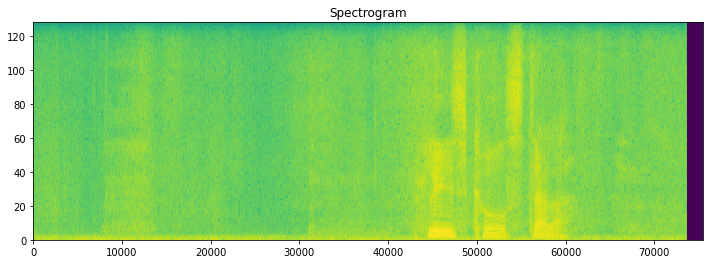

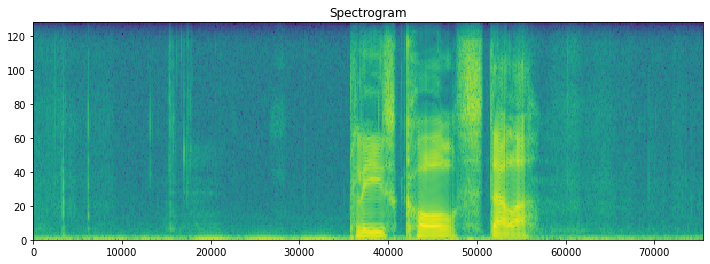

In [167]:
# The longest clip is a lot longer than most other clips
# so there's a bunch of blank space in most spectrograms :(
for spectro, speaker in audio_ds.take(3):
  preview_spectrogram(spectro)

#### Map to (spectrogram, speaker_index)

In [168]:
for spectrogram, speaker in audio_ds.take(3):
  print(speaker)

tf.Tensor(b'p225', shape=(), dtype=string)
tf.Tensor(b'p226', shape=(), dtype=string)
tf.Tensor(b'p227', shape=(), dtype=string)


In [169]:
def speaker_mapper(spectrogram, speaker):
  # convert to index
  speaker = tf.argmax(speaker == speaker_list)
  speaker = [speaker]
  return spectrogram, speaker

# debug preview before committing the operation to the variable
for spectrogram, speaker in audio_ds.map(speaker_mapper).take(3):
  print(f"Speaker: {speaker.numpy()}")
  print(f"Loss predicting speaker 1: {keras.losses.SparseCategoricalCrossentropy()(speaker, [[0.05, 0.95, 0]]).numpy()}")

Speaker: [0]
Loss predicting speaker 1: 2.995732307434082
Speaker: [1]
Loss predicting speaker 1: 0.05129344388842583
Speaker: [2]
Loss predicting speaker 1: 16.11809730529785


In [170]:
audio_ds = audio_ds.map(speaker_mapper, num_parallel_calls=AUTOTUNE)

### Model building

#### Determine input shape

In [171]:
for spectro, speaker in audio_ds.take(1):
  input_shape = spectro.shape
print(input_shape)

(585, 129, 1)


#### Determine number of classes

In [172]:
# find the largest value from the sparse categorical indices
num_labels = audio_ds.reduce(np.int64(0), lambda a,b: a if a > b[1] else b[1]).numpy()[0] + 1
num_labels

3

#### Define layers and model

In [173]:
input_layer = keras.Input(shape = input_shape, name="input_image")
# resize_layer = layers.Resizing(128,128)(input_layer)
# conv1_layer = layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding="same", name="conv2d_1")(input_layer)
# conv1_layer = layers.Conv2D(filters=32, kernel_size=3, activation="relu", name="conv2d_1")(resize_layer)
# max1_layer = layers.MaxPooling2D(pool_size=(2,2), name="max_1")(conv1_layer)
# flat_layer = layers.Flatten()(max1_layer)
# flat_layer = layers.Flatten()(conv1_layer)
flat_layer = layers.Flatten()(input_layer)
predict_layer = layers.Dense(num_labels, activation="softmax", name="speaker")(flat_layer)

model = keras.Model(
    inputs = {
        "spectrogram": input_layer
    },
    outputs = {
        "speaker": predict_layer
    }
)

model.compile(
    optimizer=keras.optimizers.Adam(),
    # loss="sparse_categorical_crossentropy",
    # loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    # loss="categorical_crossentropy",
    # loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 585, 129, 1)]     0         
                                                                 
 flatten_3 (Flatten)         (None, 75465)             0         
                                                                 
 speaker (Dense)             (None, 3)                 226398    
                                                                 
Total params: 226,398
Trainable params: 226,398
Non-trainable params: 0
_________________________________________________________________


In [174]:
for spec,speak in audio_ds:
  print(spec.shape, speak.shape, speak)

(585, 129, 1) (1,) tf.Tensor([0], shape=(1,), dtype=int64)
(585, 129, 1) (1,) tf.Tensor([1], shape=(1,), dtype=int64)
(585, 129, 1) (1,) tf.Tensor([2], shape=(1,), dtype=int64)


### Model training

In [175]:
history = model.fit(
  audio_ds,
  epochs=10,
  callbacks=[
    keras.callbacks.TerminateOnNaN(),
    keras.callbacks.EarlyStopping(monitor="loss", verbose=1, patience=3),
  ],
)

Epoch 1/10
3/3 [==============================] - 0s 14ms/step - loss: 5.6618 - accuracy: 0.0000e+00
Epoch 2/10
3/3 [==============================] - 0s 12ms/step - loss: 2.4874e-05 - accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 0s 13ms/step - loss: 1.3908e-06 - accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 0s 12ms/step - loss: 1.9868e-07 - accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 0s 5ms/step - loss: 3.9736e-08 - accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 0s 10ms/step - loss: 3.9736e-08 - accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 0s 14ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
3/3 [==============================] - 0s 14ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
3/3 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
3/3 [==============================] - 0s 13ms/step - loss: 0.0000e+00 - accuracy

### Model prediction

In [181]:
sample = audio_ds.take(3)
for spectro, speaker in sample:
  print(speaker)
result = model.predict(sample)
result = tf.argmax(result["speaker"])
print(f"Predictions: {result}")

tf.Tensor([0], shape=(1,), dtype=int64)
tf.Tensor([1], shape=(1,), dtype=int64)
tf.Tensor([2], shape=(1,), dtype=int64)
Predictions: [0 1 2]
